In [1]:
import pandas as pd
import plotly.express as px

In [2]:
# topics in media : https://www.data.gouv.fr/fr/datasets/classement-thematique-des-sujets-de-journaux-televises-janvier-2005-septembre-2020/#resources
# taking official topic indexation from : http://www.inatheque.fr/publications-evenements/ina-stat/ina-stat-methodologie.html
theme_distribution = pd.read_csv('ina-barometre-jt-tv-donnees-mensuelles-2005-2020-nombre-de-sujets.csv', encoding="ANSI",sep=";")

theme_distribution['Average_nb'] = theme_distribution.loc[1:,'Nombre de sujets de JT.6'].dropna().astype(int)
# taking tv channels' total and averaging all dates on topics
theme_distribution = theme_distribution.groupby(['THEMATIQUES'])['Average_nb'].mean()
theme_distribution = theme_distribution/theme_distribution.sum()*100
print("Distribution of themes in french tv news on 6 main channels (3 state-owned) from 2005 to 2020:")
for t,i in zip(theme_distribution.index,theme_distribution):
    print(f"{t} : {round(i,2)}%")

# not represented here : advertisement

Distribution of themes in french tv news on 6 main channels (3 state-owned) from 2005 to 2020:
Catastrophes : 6.56%
Culture-loisirs : 7.48%
Economie : 9.29%
Education : 2.01%
Environnement : 4.37%
Faits divers : 4.69%
Histoire-hommages : 2.28%
International : 16.84%
Justice : 5.47%
Politique France : 9.16%
Santé : 5.1%
Sciences et techniques : 1.96%
Société : 17.69%
Sport : 7.1%


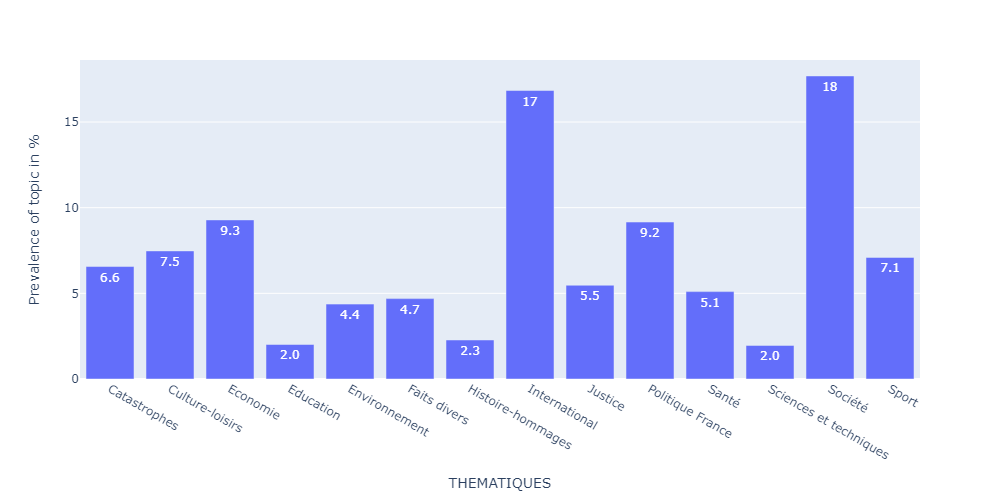

In [3]:
fig = px.bar(theme_distribution,width=1000,labels={'value':'Prevalence of topic in %'},text_auto='.2s')
fig.update_layout(showlegend=False)
fig.show("png")